<a href="https://colab.research.google.com/github/Rob1Ham/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-sequence-your-narrative/Rob_Hamilton_LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [0]:
#load libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [0]:
#load datasets
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [3]:
df = pd.merge(income, lifespan)
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [0]:
#So the income/lifespan table has country data in geo, but the
#entities table uses country so we need to merge on seperate columns
#explicitly using left_on and #right_on
merged = pd.merge(df, entities, left_on='geo', right_on='country')

In [5]:
#keeping only certain columns, by passing in a list and using
#dataframe filtering
entity_columns_to_keep = ['country', 'name', 'world_4region', 'world_6region']
entities = entities[entity_columns_to_keep]
entities.head()

,country,name,world_4region,world_6region
0,abkh,Abkhazia,europe,europe_central_asia
1,abw,Aruba,americas,america
2,afg,Afghanistan,asia,south_asia
3,ago,Angola,africa,sub_saharan_africa
4,aia,Anguilla,americas,america


In [0]:
#now we can take the entities table and merge against the country data in df
merged = pd.merge(df, entities, left_on='geo', right_on='country')
#dropping the Geo column
#merged = merged.drop('geo', axis='columns')

In [19]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [20]:
entities.head()

,country,name,world_4region,world_6region
0,abkh,Abkhazia,europe,europe_central_asia
1,abw,Aruba,americas,america
2,afg,Afghanistan,asia,south_asia
3,ago,Angola,africa,sub_saharan_africa
4,aia,Anguilla,americas,america


In [0]:
merged = pd.merge(merged,population)
merged.columns = ['geo', 'year', 'income',
       'lifespan', 'country', 'name', '4region',
       '6region', 'time','population']

In [31]:
merged.head()

,geo,year,income,lifespan,country,name,4region,6region,time,population
0,afg,1800,603,28.21,afg,Afghanistan,asia,south_asia,1800,3280000
1,afg,1801,603,28.20,afg,Afghanistan,asia,south_asia,1800,3280000
2,afg,1802,603,28.19,afg,Afghanistan,asia,south_asia,1800,3280000
3,afg,1803,603,28.18,afg,Afghanistan,asia,south_asia,1800,3280000
4,afg,1804,603,28.17,afg,Afghanistan,asia,south_asia,1800,3280000


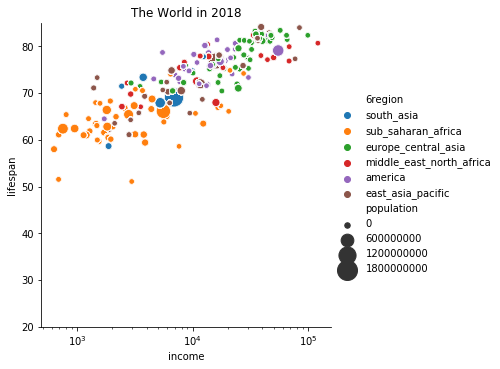

In [33]:
import seaborn as sns


# import matplotlib.pyplot as plt
now = merged[merged.year == 2018]
sns.relplot(x='income', y='lifespan', hue='6region', size='population', sizes=(30,400), data=now)
plt.xscale('log')
plt.ylim(20,85)
plt.title("The World in 2018")
plt.show()

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO